# Model the surface features of bgg data

In [56]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
bggdata_df = pd.read_pickle('datasources/BGG_FINAL.pkl')

In [58]:
bggdata_df.columns

Index(['game_rank', 'geek_rating', 'avg_rating', 'num_raters', 'game_name',
       'game_year', 'bgg_url', 'reimpl0', 'reimpl0href', 'ranks', 'avgrating',
       'titleinfo', 'gameplayinfo', 'gamecredits', 'ftr_title', 'ftr_descr',
       'gamedscription', 'rnkoverall', 'rnkthematic', 'rnkstrategy',
       'shortsummary', 'numplayersmin', 'numplayersmax', 'gamedurmin',
       'gamedurmax', 'agemin', 'gameweight', 'designer', 'artist', 'publisher',
       'gametype', 'gamecategory', 'gamemechanisms', 'gamefamily', 'rnkwar',
       'rnkcustomizable', 'rnkfamily', 'rnkabstract', 'rnkparty',
       'rnkchildren's', 'rnkamiga', 'rnkcommodore64', 'rnkarcade',
       'rnkatariST'],
      dtype='object')

### Semantically meaningful columns:

#### ftr_descr and gamemechanisms

In [59]:
bggdata_df.loc[1,'ftr_title']

'Type|Category|Mechanisms|Family|Reimplemented By|Reimplements'

### Feature descriptions

In [223]:
# Get all possible feature titles
allftrtitles = []
ftrtitles = bggdata_df['ftr_title']
ii=0
for currtitle in ftrtitles:
    x = currtitle.split('|')
    for z in x:
        if z=='':
            print(ii)
        allftrtitles.append(z)
    ii += 1
set(allftrtitles)

3057
5120


{'',
 'Category',
 'Contains',
 'Family',
 'Integrates With',
 'Mechanisms',
 'Reimplemented By',
 'Reimplements',
 'Type'}

In [ ]:
### Keep Type, Category, Mechanisms

In [ ]:
# Get values within each of these
allgametypes=[]
allgamemechs=[]
allgamecats=[]

def get_bgg_ftrs(df):
    ftrtitles = bggdata_df['ftr_title']
    typex=[]
    

In [187]:
list(ftrtitles[0].split('|'))

['Type', 'Category', 'Mechanisms', 'Family', 'Integrates With']

In [184]:
ftrtitles = bggdata_df['ftr_title']
len(bggdata_df)

18900

In [183]:
 sum(bggdata_df['ftr_title'].str.contains('Type').astype(int))

18898

In [65]:
bggdata_df.loc[1,'ftr_descr']

'Strategy,  Thematic\nView poll and results|Environmental\nMedical|Action Points\nCooperative Game\nHand Management\nLegacy Game\nPoint to Point Movement\n+ 3 more|Campaign Games\nLegacy\nPandemic\nTheme: Diseases|Pandemic Legacy: Season 2|Pandemic'

In [ ]:
ftr_desc = []
for ii in bggdata_df.index:
    dum=bggdata_df.loc[ii,'ftr_descr']
    

In [78]:
dum=bggdata_df.loc[1,'ftr_descr'].split('|')
dum

['Strategy,  Thematic\nView poll and results',
 'Environmental\nMedical',
 'Action Points\nCooperative Game\nHand Management\nLegacy Game\nPoint to Point Movement\n+ 3 more',
 'Campaign Games\nLegacy\nPandemic\nTheme: Diseases',
 'Pandemic Legacy: Season 2',
 'Pandemic']

In [70]:
' '.join(dum.split('|')).split('\n')

['Strategy,  Thematic',
 'View poll and results Environmental',
 'Medical Action Points',
 'Cooperative Game',
 'Hand Management',
 'Legacy Game',
 'Point to Point Movement',
 '+ 3 more Campaign Games',
 'Legacy',
 'Pandemic',
 'Theme: Diseases Pandemic Legacy: Season 2 Pandemic']

In [69]:
[z.split('|') for z in dum.split('\n')]

[['Strategy,  Thematic'],
 ['View poll and results', 'Environmental'],
 ['Medical', 'Action Points'],
 ['Cooperative Game'],
 ['Hand Management'],
 ['Legacy Game'],
 ['Point to Point Movement'],
 ['+ 3 more', 'Campaign Games'],
 ['Legacy'],
 ['Pandemic'],
 ['Theme: Diseases', 'Pandemic Legacy: Season 2', 'Pandemic']]

### Mechanisms

In [175]:
bggdata_df.loc[1,'game_name']

'Pandemic Legacy: Season 1'

In [61]:
bggdata_df['gamemechanisms'].unique()

array(['Action Retrieval', 'Action Points', 'Card Drafting',
       'Connections', 'Action Drafting', 'Area Majority / Influence',
       'Action/Event', 'Deck, Bag, and Pool Building', 'Dice Rolling',
       'End Game Bonuses', 'Hand Management', 'Cooperative Game',
       'Contracts', 'Automatic Resource Growth', 'Advantage Token',
       'Area Movement', 'Campaign / Battle Card Driven', 'Action Queue',
       'Auction/Bidding', 'Commodity Speculation', 'Drafting', 'Follow',
       'Ownership', 'Alliances', 'Auction: Dexterity',
       'Communication Limits', 'Catch the Leader', 'Hidden Roles',
       'Paper-and-Pencil', 'Increase Value of Unchosen Resources',
       'Auction: Dutch', 'Square Grid', 'Grid Movement',
       'Card Play Conflict Resolution', 'Deck Construction',
       'Betting and Bluffing', 'Enclosure', 'Storytelling',
       'Auction: Turn Order Until Pass', 'Simultaneous Action Selection',
       'Hidden Movement', 'Grid Coverage', 'Bingo',
       'Highest-Lowest Sc

In [168]:
x=list(bggdata_df['gamemechanisms'])
gamemechs=[]
for y in x:
    yy=str(y)
    #for z in yy: #str(y).split(','):
    gamemechs.append(yy.strip())
gamemechs_df = pd.DataFrame({'gamemech':gamemechs,'gm':gamemechs})

In [ ]:
gameme

In [169]:
dumgm=gamemechs_df.groupby('gamemech').count()

In [170]:
dumgm['log10gm']=dumgm['gm'].apply(np.log10)

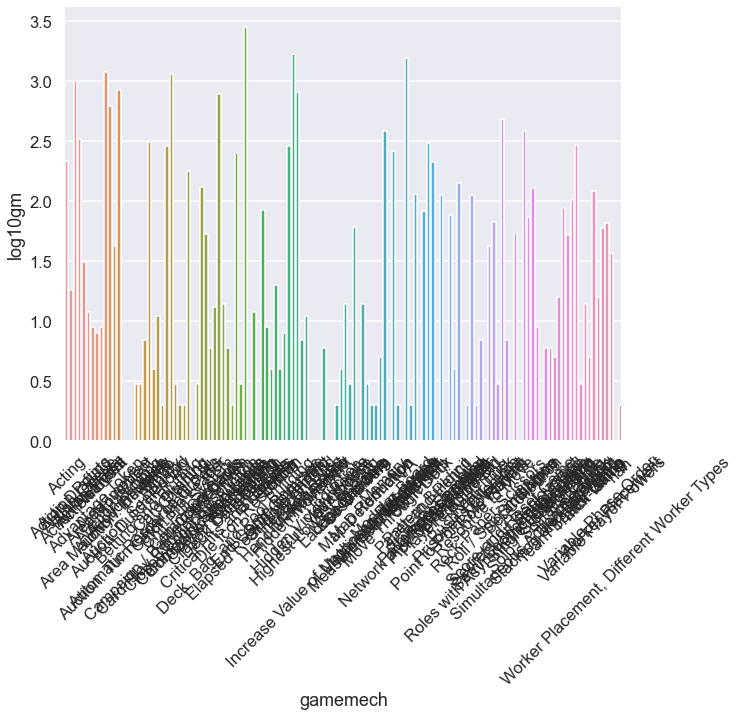

In [171]:
f,a = plt.subplots(1,1,figsize=(10,8))
sns.barplot(x=dumgm.index,y='log10gm',data=dumgm)
plt.xticks(rotation=45)
plt.show()

In [172]:
dumgm.to_csv('gamemechanisms.csv')

['Action Retrieval',
 'Action Points',
 'Card Drafting',
 'Connections',
 'Action Points',
 'Action Drafting',
 'Area Majority / Influence',
 'Action/Event',
 'Area Majority / Influence',
 'Deck, Bag, and Pool Building',
 'Area Majority / Influence',
 'Action Drafting',
 'Action Retrieval',
 'Dice Rolling',
 'End Game Bonuses',
 'Card Drafting',
 'Action Retrieval',
 'Hand Management',
 'Action Points',
 'Cooperative Game',
 'Card Drafting',
 'Contracts',
 'Automatic Resource Growth',
 'Action Drafting',
 'Card Drafting',
 'Deck, Bag, and Pool Building',
 'Automatic Resource Growth',
 'Card Drafting',
 'Advantage Token',
 'Area Movement',
 'Action Points',
 'Cooperative Game',
 'Campaign / Battle Card Driven',
 'Cooperative Game',
 'Action Queue',
 'Auction/Bidding',
 'Action Queue',
 'Dice Rolling',
 'End Game Bonuses',
 'Action Points',
 'Area Majority / Influence',
 'Commodity Speculation',
 'Automatic Resource Growth',
 'Drafting',
 'Contracts',
 'Card Drafting',
 'Action Queue',
 

### Game type

In [135]:
x=list(bggdata_df['gametype'])
gametypelist=[]
for y in x:
    yy=str(y)
    for z in str(y).split(','):
        gametypelist.append(z.strip())
gametypelist_df = pd.DataFrame({'gametype':gametypelist,'gt':gametypelist})

In [136]:
dumgt=gametypelist_df.groupby('gametype').count()

In [137]:
sns.set(context='talk')

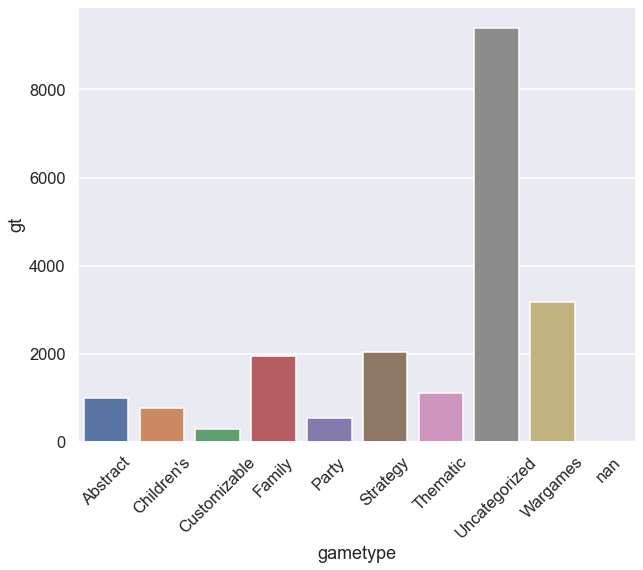

In [138]:
f,a = plt.subplots(1,1,figsize=(10,8))
sns.barplot(x=dumgt.index,y='gt',data=dumgt)
plt.xticks(rotation=45)
plt.show()

In [25]:
bggdata_df['gamecategory'].unique()

array(['Adventure', 'Environmental', 'Economic', 'Card Game',
       'Civilization', 'Civil War', 'Modern Warfare', 'American West',
       'Age of Reason', 'Dice', 'Ancient', 'Animals', 'City Building',
       'Medieval', 'Fantasy', 'Abstract Strategy', 'Bluffing',
       'Action / Dexterity', 'Industry / Manufacturing', 'Deduction',
       'Medical', 'Aviation / Flight', 'Renaissance', 'Science Fiction',
       'Trains', 'Post-Napoleonic', 'Exploration', 'Miniatures',
       'Wargame', 'Farming', 'Real-time', 'Party Game', 'Political',
       'Racing', 'Electronic', 'Negotiation', 'Collectible Components',
       'Humor', 'Fighting', 'Horror', 'Nautical', 'Napoleonic',
       'American Civil War', 'Maze', 'Puzzle', 'Arabian', 'Prehistoric',
       'Spies/Secret Agents', 'Pike and Shot', 'Travel', 'Mythology',
       'Math', "Children's Game", 'N/A', 'Movies / TV / Radio theme',
       'Educational', 'Territory Building', 'American Indian Wars',
       'Comic Book / Strip', 'Mafia', '